# Tarea 1: Piping
### Pablo Correa e Ian Gross

## Librerías

In [2]:
import CoolProp.CoolProp as cp
import fluids as fld
import numpy as np
import scipy.constants as cte
import matplotlib.pyplot as plt

from fluids.units import *

In [3]:
g = cte.g*u.m/u.s**2

## Problema 1
En un sistema de refrigeración, el refrigerante R134a fluye a través de un tubo de cobre estándar tipo
L de 3/4 de pulgada. En este sistema, se utiliza un desuperheter para calentar agua, como se muestra en
la Figura P4.3. El R134a ingresa al desuperheter a 200 psia y 225 ºF. El desuperheter extrae suficiente
energía, $Q_{DSH}$, de manera que el R134a ingresa al condensador como un vapor saturado a una presión
levemente inferior. En el condensador, se transfiere energía desde el refrigerante a una tasa de 60000
Btu/h. Esto hace que el R134a salga del condensador como un líquido saturado con una caída de presión
despreciable.

a. Determine la pérdida de carga en el desuperheater.

In [3]:
# Datos
D = (0.75*u.inch).to(u.m)
P1 = (200*u.psi).to(u.Pa) # psia = psi
T1 = (225*u.fahrenheit).to(u.K)
Q_c = (6E4*u.Btu*u.hr**(-1)).to(u.W)

fluid = 'R134a'
epsilon = fld.material_roughness('Copper')*u.mm

Realizando experimentos numéricos, se determina que el cambio de las propiedades es estable ante pequeños cambios de presión como los que se esperan entre $P_1$ y $P_2$, por lo tanto, se aproximan los datos en $P_2$ usando el valor de $P_1$.

In [4]:
# Propiedades
rho = cp.PropsSI('D','Q', 0, 'P', P1.magnitude, fluid)*u.kg/u.m**3
mu = cp.PropsSI('V','Q', 0, 'P', P1.magnitude, fluid)*u.Pa*u.s

h1 = cp.PropsSI('H','T', T1.magnitude, 'P', P1.magnitude, fluid)*u.J/u.kg # Entrada con datos de presión y temperatura
h2 = cp.PropsSI('H','P', P1.magnitude, 'Q', 1, fluid)*u.J/u.kg # Salida del desuperheater (vapor saturado)
h3 = cp.PropsSI('H','P', P1.magnitude, 'Q', 0, fluid)*u.J/u.kg # Salida del condensador (líquido saturado)

In [5]:
# Caudal
dm = Q_c/(h2-h3)
dVol = dm/rho
V = dVol/(np.pi*D**2/4)
print(f"dV = {dVol.to(u.L/u.s)}")
print(f"V = {V.to(u.m/u.s)}")

# Factor de fricción
Re = (fld.Reynolds(D=D, rho=rho, V=V, mu=mu)).to('dimensionless')
f = fld.friction.friction_factor(Re=Re, eD=epsilon/D)
print(f"Re = {Re}")
print(f"f = {f}")

dV = 0.10743772528546108 liter / second
V = 0.37694411151712093 meter / second
Re = 56755.814074374866 dimensionless
f = 0.020908030442010013 dimensionless


In [6]:
# Pérdida de carga y largo de la tubería
DP = f*rho*V**2/(2*D)*L
print(DP.to(u.kPa))

NameError: name 'L' is not defined

b. Determine la velocidad (m/s) del R134a al ingresar al condensador.

Considerando la variaciones de estado entre la entrada al desuperheater (1) y su salida (2), se sabe que el flujo másico es constante en el desuperheater por lo tanto se cumple que:
$$\dot{m} = \rho_1Av_1 = \rho_2Av_2$$
$$v_1 = \frac{\rho_2}{\rho_1}v_2$$

Despreciando el efecto de la conexión entre el desuperheater y el condensador, entonces se puede considerar que la velocidad en la salida del desuperheater es igual a la velocidad en la entrada del condensador.

In [ ]:
rho1 = cp.PropsSI('D','T', T1.magnitude, 'P',P1.magnitude, fluid) * u.kg/(u.m)**3
rho2 = cp.PropsSI('D','P', P1.magnitude, 'Q',1, fluid) * u.kg/(u.m)**3

P2 = DP - P1

r_rho = rho2/rho1

print(P1, P2)
print(r_rho)

1378951.4586336727 pascal -1353366.2769238898 kilogram * watt ** 2 / joule ** 2 / meter
1.3737583666704418 dimensionless


Por Bernoulli y considerando que:
$$\frac{P_1}{\gamma_1} + \frac{V_1^2}{2g} + \cancel{z_1} = \frac{P_2}{\gamma_2} + \frac{V_2^2}{2g} + \cancel{z_2}$$
$$\frac{P_1}{\gamma_1} + \frac{P_2}{\gamma_2} = \frac{V_2^2}{2g} - \frac{V_1^2}{2g}$$
$$\frac{P_1}{\gamma_1} - \frac{P_2}{\gamma_2} = \frac{V_2^2}{2g}(1 - (\frac{\rho_2}{\rho_1})^2)$$
$$V_2^2 = 2\frac{(\frac{P_1}{\rho_1} - \frac{P_2}{\rho_2})}{1 - (\frac{\rho_2}{\rho_1})^2}$$

In [ ]:
v2 = np.sqrt(2*(P1/rho1 - P2/rho2)/(1-(rho2/rho1)**2))
print(v2.to(u.m/u.s))

nan meter / second


c:\Users\iangr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pint\facets\numpy\numpy_func.py:322: RuntimeWarning: invalid value encountered in sqrt
  result_magnitude = func(*stripped_args, **stripped_kwargs)


c. Determine la velocidad (m/s) del R134a al salir del condensador.

Considerando las condiciones de estado del fluido en la entrada del condensador (2) y en la salida (3), se sabe que no hay variación de altura y la caida de presión de es despreciable. Por Bernoulli:
$$\frac{P_2}{\gamma_2} + \frac{V_2^2}{2g} + \cancel{z_2} = \frac{P_3}{\gamma_3} + \frac{V_3^2}{2g} + \cancel{z_3}$$
$$P2 = P3 = P$$
$$\frac{P}{\gamma_2} + \frac{V_2^2}{2g} = \frac{P}{\gamma_3} + \frac{V_3^2}{2g}$$
$$\frac{V_3^2}{2g} = \frac{V_2^2}{2g} + P(\frac{1}{\gamma_2} - \frac{1}{\gamma_3})$$
$$V_3^2 = V_2^2 + 2P(\frac{1}{\rho_2} - \frac{1}{\rho_3})$$

d. Investigue sobre correlaciones de pérdida de carga en tuberías con flujo bigfásico. Proponga
una expresión para estimar la pérdida de carga en el condensador. ¿qué información sería necesaria?

e. Cuál es la diferencia entre una tubería tipo L y una tipo M

Las tuberías tipo L tienen un espesor proporcional mayor al de la tuberías tipo M. Esto les permite soportar mayores presiones y, por lo tanto, se utilizan en aplicaciones industriales o de transporte de gas licuado o gas natural. A motivo del mayor requerimiento de material, las tuberías L tienen un costo más elevado. Además, el mayor espesor de la tubería L le da una durabilidad notablemente mayor frente al mismo uso. [1,2]

## Problema 2
Gas Natural fluye con una velocidad promedio de 100 ft/s por una tubería de cobre de 300 m y $1\frac{1}{4}$
inch de diámetro. La temperatura del gas es 20 ◦C y la presión inicial es de 1000 psig.

a. Asumiendo que el flujo es incompresible, determine la variación de la presión (pérdida de
carga) en la tubería.

Bernoulli:
$$\frac{P_1}{\gamma} + \cancel{\frac{V_1^2}{2g}} + \cancel{z_1} = \frac{P_2}{\gamma} + \cancel{\frac{V_2^2}{2g}} + \cancel{z_2} + f\frac{L}{D}\frac{V_2^2}{2g}$$
$$\frac{P_1}{\gamma} = \frac{P_2}{\gamma} + f\frac{L}{D}\frac{V^2}{2g}$$
$$P_2 = P_1 - f\frac{L}{D}\frac{\rho V^2}{2}$$

In [ ]:
# Datos
V = (100*u.ft*u.s**(-1)).to(u.m*u.s**(-1))
L = 300 * u.m
D = (1.25 * u.inch).to(u.m)
T = (20 * u.celsius).to(u.K)
P1 = ((1000+14.7)*u.psi).to(u.Pa) # Está en psiG

Para calcular las propiedades del gas natural, es necesario crear una mezcla. Utilizando los datos de Enel [3], se normalizan los tres componentes más relevantes para obtener:

0.931677% Metano, 0.0660455% Etano, 0.00227743% Propano

In [ ]:
# Propiedades
fluid = "Methane[0.931677]&Ethane[0.0660455]&Propane[0.00227743]"
rho1 = cp.PropsSI('D','T', T.magnitude, 'P',P1.magnitude, fluid)*u.kg/u.m**3
mu = cp.PropsSI('V','T', T.magnitude, 'P',P1.magnitude, fluid)*u.Pa*u.s
print(f"rho: {rho1}")
print(f"mu: {mu}")

rho: 57.00904806016102 kilogram / meter ** 3
mu: 1.265970887616968e-05 pascal * second


In [ ]:
# Fricción
Re = (fld.Reynolds(D=D, rho=rho1, V=V, mu=mu)).to('dimensionless')
epsilon = (fld.material_roughness('Copper'))*u.mm
f = fld.friction.friction_factor(Re, eD=epsilon/D)
print(f"Re = {Re}")
print(f"f = {f}")


Re = 4357915.076040234 dimensionless
f = 0.012278121652104726 dimensionless


In [ ]:
# Bernoulli
P2 = P1 - (f*rho1*V**2*L)/(2*D)
print(f"P1: {P1}")
print(f"P2: {P2}")

P1: 6996110.225377939 pascal
P2: 3923884.1136408392 pascal


b. Determine el grado de error introducido por el supuesto.

$$\frac{P_1}{g\rho_1} = \frac{P_2}{g\rho_2} + f\frac{L}{D}\frac{V^2}{2g}$$
Esto está mal

In [ ]:
rho2 = cp.PropsSI('D','T', T.magnitude, 'P',P2.magnitude, fluid)*u.kg/u.m**3
l_izq = (P1/(rho1*g)).to(u.m)
l_der = (P2/(rho2*g)).to(u.m)

print(f"l_izq: {l_izq}, l_der: {l_der}")
print(f"diferencia: {l_izq-l_der}")

l_izq: 12513.88554509816 meter, l_der: 13387.889231907098 meter
diferencia: -874.0036868089392 meter


c. Verifique la validez del supuesto.

d. Haga una evaluación (gráfico) del error vs longitud de la tubería.

e. ¿Cuánto influencia la temperatura en la pérdida de carga? Grafique

## Problema 3
Se utiliza una tubería horizontal para transportar etanol (alcohol etílico) a 20 ◦C a lo largo de una
distancia de 3 km. La tubería está hecha de acero comercial. El caudal requerido de etanol es de 40
L/s. La bomba conectada a esta tubería puede superar una caída de presión de hasta 200 kPa en la
tubería.

a. Especifique el tamaño apropiado (diámetro nominal) de una tubería de tipo Schedule 40 para esta tubería.
Se toma el valor de epsilon de PipeFlow [4]:

In [7]:
# Datos
T = (20 * u.celsius).to(u.K)
L = 3E3 * u.m
dVol = 40 * u.L*u.s**(-1)
DP_max = 200E3 * u.Pa

fluid = "Ethanol"
epsilon = (0.045*u.mm).to(u.m)

In [8]:
# Propiedades
rho = cp.PropsSI('D','Q', 0, 'P', DP_max.magnitude, fluid)*u.kg/u.m**3
mu = cp.PropsSI('V','Q', 0, 'P', DP_max.magnitude, fluid)*u.Pa*u.s

Bernoulli:
$$\frac{P_1}{\gamma} + \cancel{\frac{V_1^2}{2g}} + \cancel{z_1} = \frac{P_2}{\gamma} + \cancel{\frac{V_2^2}{2g}} + \cancel{z_2} + f\frac{L}{D}\frac{V_2^2}{2g}$$
Se obtiene un sistema de dos ecuaciones.
$$200kPa \geq \Delta P = f\frac{L}{D}\frac{\rho V^2}{2} = f\frac{8\rho L}{D^5\pi^2}\dot{\forall}^2$$
$$40Ls^{-1} = \dot{\forall} = VA = V\frac{\pi D^2}{4}$$
Se quiere resolver para D, por lo tanto:
$$200kPa \geq \Delta P = f\frac{8\rho L}{D^5\pi^2}\dot{\forall}^2$$
$$V = \frac{160Ls^{-1}}{\pi D^2}$$
Como existe diámetros fijos para las tuberías schedule 40, se crea una lista con valores extraídos de Wesco [5]. Además, por propósitos de simplicidad, se redondean los valores obtenidos, tratando de mantener por lo menos tres figuras significativas.

In [9]:
l_D = ([1/8, 1/4, 3/8, 1/2, 3/4, 1, 1.25, 1.5, 2, 2.5, 3, 3.5, 4, 6, 8, 10]*u.inch).to(u.m)

V = (4*dVol/(np.pi*l_D**2)).to(u.m/u.s)

l_Re = []
l_f = []
for i in range(len(l_D)):
    Re = (fld.Reynolds(D=l_D[i], rho=rho, V=V[i], mu=mu)).to('dimensionless')
    l_Re.append(int(Re.magnitude))
    f = fld.friction.friction_factor(Re=l_Re[i], eD=epsilon/l_D[i])
    l_f.append(f.magnitude.round(4))
print(f"Re = {l_Re}")
print(f"f = {l_f}")

Re = [33909193, 16954596, 11303064, 8477298, 5651532, 4238649, 3390919, 2825766, 2119324, 1695459, 1412883, 1211042, 1059662, 706441, 529831, 423864]
f = [0.0428, 0.0339, 0.0299, 0.0274, 0.0245, 0.0227, 0.0215, 0.0206, 0.0192, 0.0183, 0.0177, 0.0172, 0.0168, 0.0159, 0.0156, 0.0155]


In [10]:
l_DP = []
l_DP2 = []
for i in range(len(l_D)):
    DP = l_f[i]*rho*V[i]**2*L/(2*l_D[i])
    l_DP.append(int(DP.magnitude))
l_DP *= u.Pa
print(f"DP = {l_DP}")

DP = [370366958406874   9167231228090   1064764052956    231546953954     27264547760      5994657681      1860488225       716389902       158449101        49486823        19235590         8648220         4332592          539982          125722           40932] pascal


In [11]:
for i in range(len(l_DP)):
    if l_DP[i].magnitude < DP_max.magnitude:
        print(f"La menor cañería que cumple las especificaciones del problema es:")
        print(f"D = {l_D[i].to(u.inch)}")
        print(f"Con una caida de presión de {l_DP[i]}")
        break

La menor cañería que cumple las especificaciones del problema es:
D = 8.0 inch
Con una caida de presión de 125722 pascal


b. Grafique el caudal máximo que sería entregado por diferentes diametros del schedule
indicado.

Esta vez, se asume que la presión queda fija en $200kPa$ y así obtener el valor máximo:
$$200kPa = f\frac{L}{D}\frac{\rho V^2}{2}$$
$$40Ls^{-1} = \dot{\forall} = VA = V\frac{\pi D^2}{4}$$
Reordenando:
$$V = \sqrt{\frac{2D\times 200kPa}{fL\rho}}$$
$$\dot{\forall} = V\frac{\pi D^2}{4}$$


In [ ]:
l_dVol = []
for i in range(len(l_D)):
    V = np.sqrt(2*l_D[i]*DP_max/(l_f[i]*rho*L))
    dVol = (V*np.pi*D[i]**2/4).to(u.L/u.s)
    l_dVol.append(dVol.magnitude)
print(f"dVol = {l_dVol}")

dVol = [0.0009944808764324466, 0.006330455492115281, 0.018547520652326815, 0.03977342744575406, 0.115907997960211, 0.24718969382004485, 0.44474536840530393, 0.7167942375454731, 1.5244093143647037, 2.7280832297459665, 4.388614165964519, 6.546195004583957, 9.277934333576509, 26.46433916025965, 55.416283697602815, 97.80460130880377]


c:\Users\iangr\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


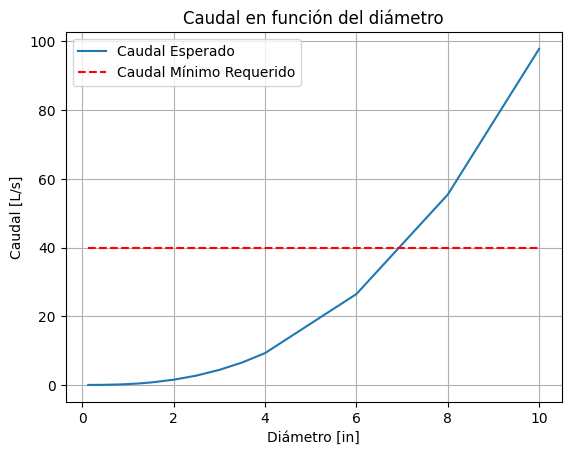

In [ ]:
plt.plot(l_D.to(u.inch), l_dVol, label="Caudal Esperado")
plt.plot(l_D.to(u.inch), 40*np.ones(len(l_D)), 'r--', label = "Caudal Mínimo Requerido")
plt.title("Caudal en función del diámetro")
plt.xlabel("Diámetro [in]")
plt.ylabel("Caudal [L/s]")
plt.grid()
plt.legend()
plt.show()

## Problema 4
Considere el plano hidráulico de la localidad de Hualañé.

a. Establezca un código computacional, que permita estimar la pérdida de carga máxima en el sistema, cuando todas las casas tienen una llave de
lavamanos abierta.

De acuerdo a la Superintendencia de Servicios Sanitarios, "el Manual de Proyectos de Agua Potable Rural 2019, dicta que los servicios que fueron construidos y rehabilitados a partir del año 2020 deberán tener una presión mínima de servicio de 15 metros columna de agua (1,5 bar), y una máxima de 70 metros columna de agua (7bar)". Además, la pérdida de carga en el arranque no debe superar los 5mca al abrir la llave [6].

"Las velocidades del agua en las tuberías no deben exceder de 2,5 m/s en las tuberías exteriores y de distribución principal y 2,0 m/s en las tuberías de la red interior" [7].

Como en este caso, todas las casas se encuentran paralelas en el circuito, la presión sin considerar pérdidas de carga deberá ser para todas las casas igual.

In [5]:
# Largo de la Tubería por tramos
# Primera Vertical
L1 = 48.55
# Horizontal hasta primera bifuración. Se consideran tramos rectos en ciertos intervalos
L2 = np.sqrt(4.79**2 + 1.03**2) + np.sqrt(120**2+ (108.17-101.03)**2) + np.sqrt(20**2 + (144.79-124.79)**2) + 4

print(L2)


157.39598834831446


In [ ]:
T = (20 * u.celsius).to(u.K) # Temperatura del suelo

fluid = "water"
rho = cp.PropsSI('D','Q', 0, 'P', DP_max.magnitude, fluid)*u.kg/u.m**3
mu = cp.PropsSI('V','Q', 0, 'P', DP_max.magnitude, fluid)*u.Pa*u.s

b. Grafique la pérdida de carga asociada a cada casa si el diámetro de todas las
tuberías es de 1 pulgada.

# Bibliografía

[1] https://woolfplumbing.com.au/blog/the-differences-between-copper-pipes-type-l-and-type-m

[2] https://sodimac.falabella.com/sodimac-cl/page/como-elegir-tuberias-y-fittings-de-cobre

[3] https://www.enel.cl/es/inversionistas/inversionistas-enel-generacion/nuestras-centrales/gasoducto/informacion-general.html

[4] https://www.pipeflow.com/pipe-pressure-drop-calculations/pipe-roughness

[5] https://www.wesco.com.co/default.asp?iID=GFLJKE

[6] https://www.siss.gob.cl/586/articles-19503_Man_Pre_SSR.pdf

[7] https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://estudiantes.cftla.cl/parciales/descargar.php%3Fidm%3D66311&ved=2ahUKEwjWtYXRu7GIAxWcCrkGHTjxGw0QFnoECBYQAQ&usg=AOvVaw2tcraPkc8wn1s3hNnku404